In [1]:
import numpy as np
import pandas as pd
import missingno as msno 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./multiple_choice_responses.csv')
questions_unique = pd.read_csv('./questions_only.csv')

C:\Users\tigra\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


In [3]:
q_list = list(df.iloc[0])

In [4]:
q_num_list = list(df.columns)
df_null_ratio = list(np.round(np.mean(df.isnull()), 2))

In [5]:
len(df_null_ratio)

246

In [6]:
null_values = pd.DataFrame({'q_num': q_num_list, 'question': q_list, 'df_null_ratio': df_null_ratio})
null_values.head(246)

,q_num,question,df_null_ratio
0,Time from Start to Finish (seconds),Duration (in seconds),0.00
1,Q1,What is your age (# years)?,0.00
2,Q2,What is your gender? - Selected Choice,0.00
3,Q2_OTHER_TEXT,What is your gender? - Prefer to self-describe...,0.00
4,Q3,In which country do you currently reside?,0.00
...,...,...,...
241,Q34_Part_9,Which of the following relational database pro...,0.98
242,Q34_Part_10,Which of the following relational database pro...,0.97
243,Q34_Part_11,Which of the following relational database pro...,0.94
244,Q34_Part_12,Which of the following relational database pro...,0.99


In [7]:
questions_unique_list = list(questions_unique.iloc[0])

for i in range(len(questions_unique_list)):
    print(f"Q{i}: {questions_unique_list[i]}")

Q0: Duration (in seconds)
Q1: What is your age (# years)?
Q2: What is your gender? - Selected Choice
Q3: In which country do you currently reside?
Q4: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Q5: Select the title most similar to your current role (or most recent title if retired): - Selected Choice
Q6: What is the size of the company where you are employed?
Q7: Approximately how many individuals are responsible for data science workloads at your place of business?
Q8: Does your current employer incorporate machine learning methods into their business?
Q9: Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice
Q10: What is your current yearly compensation (approximate $USD)?
Q11: Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?
Q12: Who/what are your favorite media sources tha

In [8]:
df = df.drop([0, 0])

In [9]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1
5,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [10]:
df['Q1'] = df['Q1'].replace('70+', '70-70')
new_age = df['Q1'].str.split("-", n = 1, expand = True)

In [11]:
df['min_age'] = new_age[0].astype(int)
df['max_age'] = new_age[1].astype(int)
df['avg_age'] = (df['min_age'] + df['max_age']) / 2

In [12]:
def plot_bar(df, df_column, top_n = 50):
    #The function takes the name of the df and the name of the column as a 'sring'.
    question = null_values.loc[null_values['q_num'] == df_column, 'question'].iloc[0]
    print(question)
    cut_num = df[df_column].value_counts()[:top_n]
    chart = sns.barplot(x = cut_num.index, y = cut_num, data = df)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()

What is your gender? - Selected Choice


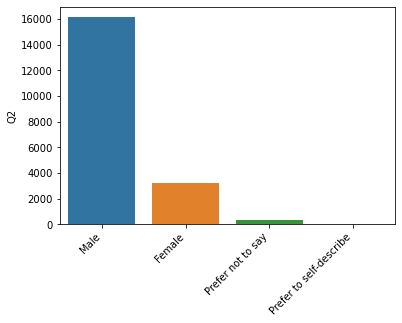

In [13]:
plot_bar(df, 'Q2')

In [14]:
df = df.drop(['Q2_OTHER_TEXT'], axis = 1)

In which country do you currently reside?


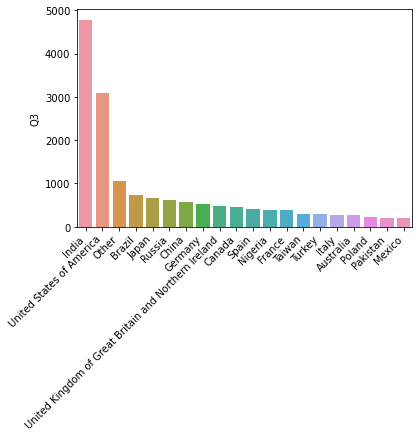

In [15]:
plot_bar(df, 'Q3', top_n = 20)

What is the highest level of formal education that you have attained or plan to attain within the next 2 years?


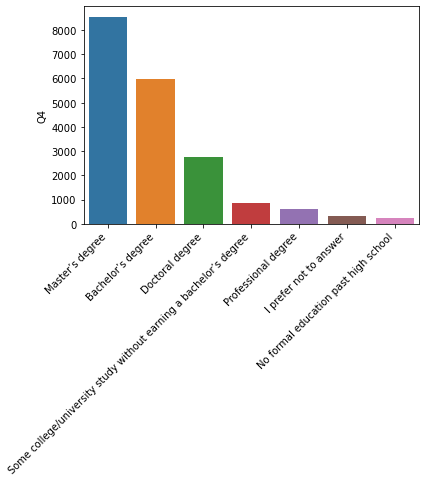

In [16]:
plot_bar(df, 'Q4', top_n = 20)

In [17]:
df['Q4'] = df['Q4'].fillna(df['Q4'].value_counts().index[0])

What is the highest level of formal education that you have attained or plan to attain within the next 2 years?


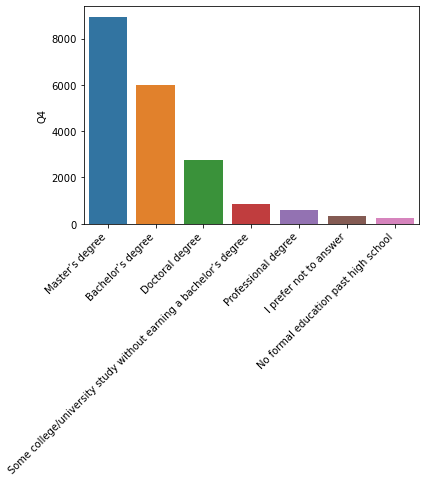

In [18]:
plot_bar(df, 'Q4', top_n = 20)

Select the title most similar to your current role (or most recent title if retired): - Selected Choice


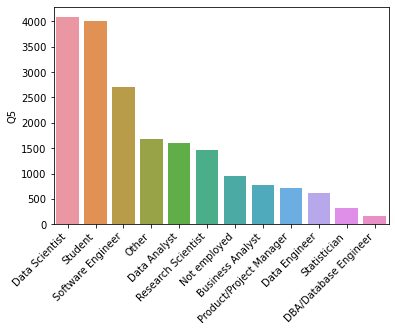

In [19]:
plot_bar(df, 'Q5')

Select the title most similar to your current role (or most recent title if retired): - Other - Text


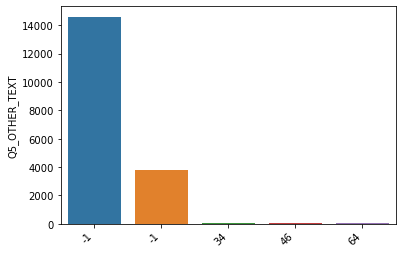

In [20]:
plot_bar(df, 'Q5_OTHER_TEXT', top_n = 5)

In [21]:
df = df.drop(['Q5_OTHER_TEXT'], axis = 1)

What is the size of the company where you are employed?


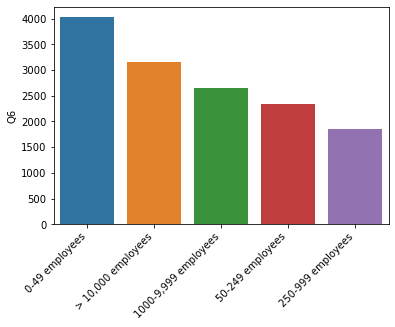

In [22]:
plot_bar(df, 'Q6')

In [23]:
df['Q6'].isnull().sum()

5715

In [24]:
df['Q6'] = df['Q6'].fillna(0)

Approximately how many individuals are responsible for data science workloads at your place of business?


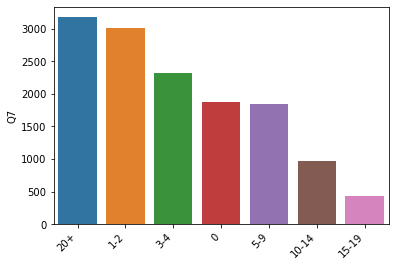

In [25]:
plot_bar(df, 'Q7')

In [26]:
df['Q7'] = df['Q7'].replace('20+', '20').replace('1-2', '1.5').replace('3-4', '3.5').replace('5-9', '7').replace('10-14', '12').replace('15-19', '17').astype('float')

In [27]:
df['Q7'] = df['Q7'].fillna(df['Q7'].mean()).astype('int')

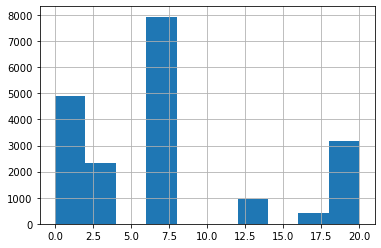

In [28]:
df['Q7'].hist()

In [29]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9_Part_1,...,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,min_age,max_age,avg_age
1,510,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,22,24,23.0
2,423,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,40,44,42.0
3,83,55-59,Female,Germany,Professional degree,NaN,0,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,55,59,57.0
4,391,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20,I do not know,NaN,...,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1,40,44,42.0
5,392,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,22,24,23.0
